# Working with images

Up to now we have worked with numerical data (data from experiments to be
  adapted to models, simulations of differential equations) and relational data
  (networks). This isn't the only type of data you can happen to be dealing with.
Another rather frequent occurrence is that of having to analyze images from
various sources. We will deal here with the solution of some problems that
concern them.

The **first issue** we have to solve, is indeed interfacing the computer with
this type of data. MATLAB commands can *read*, *write*, and *display* several
types of image file formats:
- BMP
- GIF
- HDF
- JPEG
- PCX
- PNG
- TIFF
- XWD

Let us start by downloading from the internet a cat photo and loading it into
MATLAB:

In [1]:
websave('cat.jpg','https://upload.wikimedia.org/wikipedia/commons/5/52/Panthera_leo_stretching_%28Etosha%2C_2012%29.jpg');
A = imread("cat.jpg");

As we have seen many times, the fundamental data in MATLAB is the *array*, and
thus the variable `A` we have obtained with the `imread` command is indeed a
type of array. In many cases, images can be represented by using matrices, in
which entry corresponds to a *single pixel* of the given image. Some images,
for example RGB color images, require instead a tensor to be represented, that
is, if you prefer, a three-dimensional array. In the first plane (with respect
  to the third dimension) we represent the red pixel intensities, in the second
  one we represent the green pixel intensities, and finally in the third one
  the blue pixel intensities.

Indeed, if we query for the variable we have just created, we find as much

In [2]:
whos A

  Name         Size                   Bytes  Class    Attributes

  A         2000x3000x3            18000000  uint8              



that is $A$ is a vector of integers of sizes $2000 \times 3000 \times 3$. We can
look at the figure it represents by doing

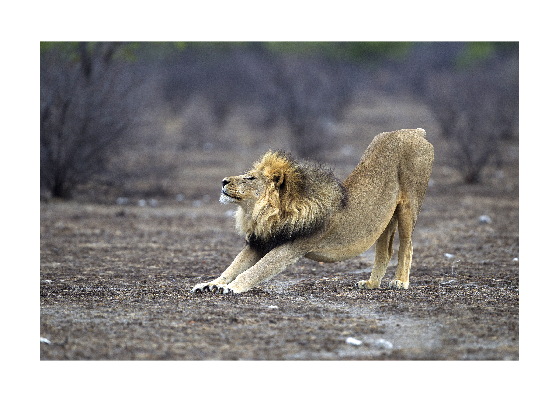

In [3]:
imshow(A);

Other general utility functions that we can consider are
- converting an RGB image to grayscale

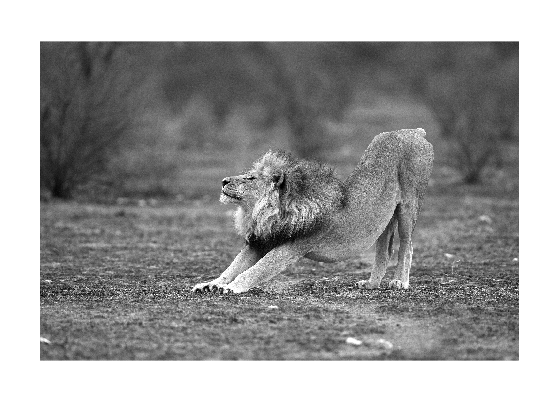

In [4]:
Agray = rgb2gray(A);
imshow(Agray);

- create a *tiled image* from multiple images

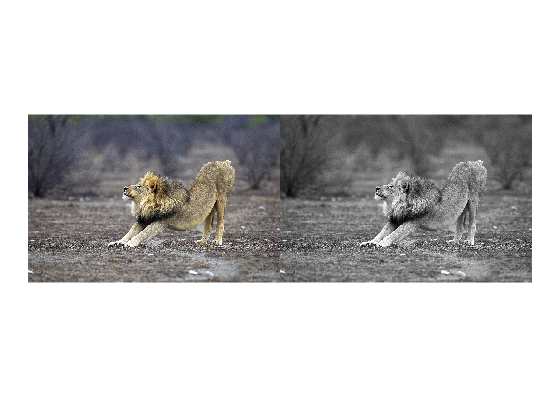

In [5]:
tile = imtile({A,Agray});
imshow(tile);

- cropping and saving a reduced size image
```{code} matlab
image(A); axis image;
p = ginput(2);
% Get the x and y corner coordinates as integers
sp(1) = min(floor(p(1)), floor(p(2))); %xmin
sp(2) = min(floor(p(3)), floor(p(4))); %ymin
sp(3) = max(ceil(p(1)), ceil(p(2)));   %xmax
sp(4) = max(ceil(p(3)), ceil(p(4)));   %ymax
CroppedA = A(sp(2):sp(4), sp(1): sp(3),:);
figure; image(CroppedA); axis image
imwrite(CroppedA,'cropped_cat.jpg');
```
```{image} images/cropped_cat.jpg
:alt: cropped cat
:align: center
:width: 80%
```
in which we have used the `ginput` command to get the coordinates of some
points from the figure, and the `imwrite` command to save the cropped figure
to a file.
- obtaining information about graphics files (maybe useful before loading them)

In [6]:
iminfo = imfinfo('cat.jpg')

> In matlab.io.internal.imagesci.imjpginfo>incorporate_exif_metadata (line 68)
In matlab.io.internal.imagesci.imjpginfo (line 51)
In imjpginfo (line 20)
In imfinfo (line 234)



iminfo = 

  struct with fields:

           Filename: '/home/cirdan/Documenti/RTDa-PISA/Didattica/NumRecipes/recipesforenvsciences/src/cat.jpg'
        FileModDate: '23-Mar-2022 23:20:15'
           FileSize: 5210752
             Format: 'jpg'
      FormatVersion: ''
              Width: 3000
             Height: 2000
           BitDepth: 24
          ColorType: 'truecolor'
    FormatSignature: ''
    NumberOfSamples: 3
       CodingMethod: 'Huffman'
      CodingProcess: 'Sequential'
            Comment: {}
               Make: 'Canon'
              Model: 'Canon EOS-1D Mark IV'
        Orientation: 1
        XResolution: 240
        YResolution: 240
     ResolutionUnit: 'Inch'
           Software: 'Adobe Photoshop CS2 Windows'
           DateTime: '2014:01:26 13:25:17'
             Artist: 'Yathin Krishnappa'
          Copyright: 'yathin.com'
      DigitalCamera: [1x1 struct]
      ExifThumbnail: [1x1 struct]



- resizing images, if you want to enlarge a figure you need to *guess* somehow
the value of the missing pixels, similarly, if you reduce it, you have to
*decide* how to modify the remaining ones. This is done via an *interpolation kernel*
function that calculates the value of a pixel using a weighted average of
neighboring pixel values

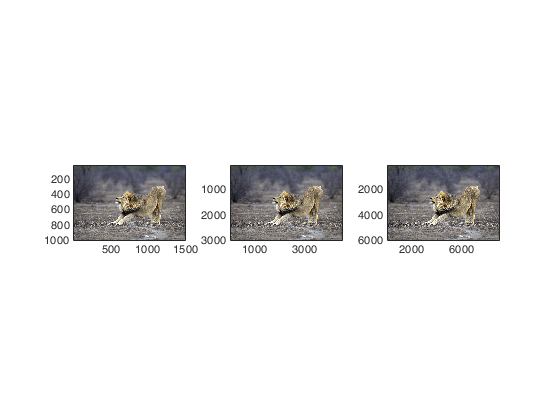

In [7]:
subplot(1,3,1)
Ares = imresize(A, 0.5, "Method","bicubic");
image(Ares); axis image;
subplot(1,3,2)
Ares = imresize(A, 1.5, "Method","bilinear");
image(Ares); axis image;
subplot(1,3,3)
Ares = imresize(A, 3, "Method","nearest");
image(Ares); axis image;

## Denoising images

A part from photos of cats sometimes we get photos from experimental instruments
that are littered with noise, and that we wish to remove. This may be either for
simply having a better looking photo, or as a first step in a following analysis.

From the **wavelet Toolbox** you can use the following procedure to *denoise* an
image:

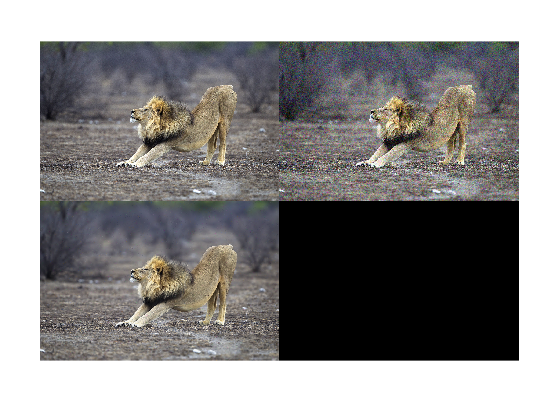

In [8]:
Anoise = imnoise(A,'gaussian',0,0.01);
tile = imtile({A,Anoise});
imshow(tile);
Adenoise = wdenoise2(Anoise);
tile = imtile({A,Anoise,uint8(Adenoise)});
imshow(tile);

::::{tip}
A **wavelet transforms** of a given signal of finite energy acts as a projection
on a continuous family of *frequency bands*. We can represent, for instance, the
signal could be represented on every frequency band $[f,2f]$ for all $f > 0$,
for example for $f = 1$ one could select the function
```{math}
\phi(t) = \frac{\sin(2\pi t) - \sin(\pi t)}{\pi t},
```
and for the bands $[1/a,2/a]$ by the function
```{math}
\phi_{a,b} = \frac{1}{\sqrt{a}} \phi\left(\frac{t-b}{a}\right), \quad b \in \mathbb{R}.
```
Then a signal $x(t)$ can be decomposed as
```{math}
x_a(t) = \int_{\mathbb{R}} W_\phi\{x\}(a,b) \cdot \phi_{a,b}(t)\,\textrm{d}b, \quad W_\phi\{x\}(a,b) = \int_{\mathbb{R}} x(t) \phi_{a,b}(t)\,\textrm{d}t.
```
Since it is *computationally intractable* to analyze a continuous signal this
way, we usually reduce to a *smaller set of discrete coefficients*
```{math}
x(t) = \sum_{m \in \mathbb{Z}}\sum_{n \in mathbb{Z}} C_{m,n} \phi_{m,n}(t), \quad \phi_{m,n}(t) = \frac{1}{\sqrt{a^m}} \phi\left(\frac{t-nb}{a^m}\right), \quad C_{m,n} = \int_{\mathbb{R}} x(t) \phi_{m,n}(t)\,\textrm{d}t.
```
In any case, when we have computed the coefficient, what we do to *denoise the image*
is to throw away the "small one" that are mostly noises, while the "large ones"
contain actual signal.
::::

Further options can be analyzed by looking at the `help wdenoise2`.

This is a classic way of solving this kind of problem. In recent times, another
widely used approach is that of **neural networks**. The **Image Processing MATLAB Toolbox**
has a *pretrained* neural network for denoising *black and white* images, it can
be called by doing:

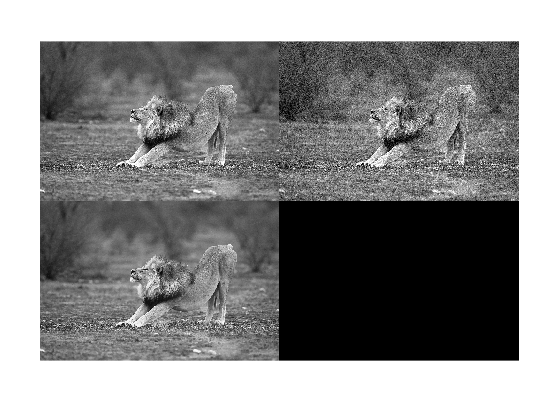

In [9]:
Agray = rgb2gray(A);
Agraynoise = imnoise(Agray,'gaussian',0,0.01);
net = denoisingNetwork('DnCNN');
Adenoisenet = denoiseImage(Agraynoise,net);
tile = imtile({Agray,Agraynoise,uint8(Adenoisenet)});
imshow(tile);

the network `denoisingNetwork('DnCNN')` is a rather complex object whose
structure can be investigated by doing

In [10]:
disp(net.Layers)

  59x1 Layer array with layers:



     1   'InputLayer'             Image Input           50x50x1 images


     2   'Conv1'                  Convolution           64 3x3x1 convolutions with stride [1  1] and padding [1  1  1  1]


     3   'ReLU1'                  ReLU                  ReLU


     4   'Conv2'                  Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


     5   'BNorm2'                 Batch Normalization   Batch normalization with 64 channels


     6   'ReLU2'                  ReLU                  ReLU


     7   'Conv3'                  Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


     8   'BNorm3'                 Batch Normalization   Batch normalization with 64 channels


     9   'ReLU3'                  ReLU                  ReLU


    10   'Conv4'                  Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    11   'BNorm4'                 Batch Normalization   Batch normalization with 64 channels


    12   'ReLU4'                  ReLU                  ReLU


    13   'Conv5'                  Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    14   'BNorm5'                 Batch Normalization   Batch normalization with 64 channels


    15   'ReLU5'                  ReLU                  ReLU


    16   'Conv6'                  Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    17   'BNorm6'                 Batch Normalization   Batch normalization with 64 channels


    18   'ReLU6'                  ReLU                  ReLU


    19   'Conv7'                  Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]
    20   'BNorm7'                 Batch Normalization   Batch normalization with 64 channels


    21   'ReLU7'                  ReLU                  ReLU


    22   'Conv8'                  Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    23   'BNorm8'                 Batch Normalization   Batch normalization with 64 channels


    24   'ReLU8'                  ReLU                  ReLU


    25   'Conv9'                  Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    26   'BNorm9'                 Batch Normalization   Batch normalization with 64 channels


    27   'ReLU9'                  ReLU                  ReLU
    28   'Conv10'                 Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    29   'BNorm10'                Batch Normalization   Batch normalization with 64 channels


    30   'ReLU10'                 ReLU                  ReLU


    31   'Conv11'                 Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    32   'BNorm11'                Batch Normalization   Batch normalization with 64 channels


    33   'ReLU11'                 ReLU                  ReLU


    34   'Conv12'                 Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    35   'BNorm12'                Batch Normalization   Batch normalization with 64 channels


    36   'ReLU12'                 ReLU                  ReLU


    37   'Conv13'                 Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    38   'BNorm13'                Batch Normalization   Batch normalization with 64 channels


    39   'ReLU13'                 ReLU                  ReLU
    40   'Conv14'                 Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    41   'BNorm14'                Batch Normalization   Batch normalization with 64 channels


    42   'ReLU14'                 ReLU                  ReLU


    43   'Conv15'                 Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]
    44   'BNorm15'                Batch Normalization   Batch normalization with 64 channels


    45   'ReLU15'                 ReLU                  ReLU


    46   'Conv16'                 Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    47   'BNorm16'                Batch Normalization   Batch normalization with 64 channels


    48   'ReLU16'                 ReLU                  ReLU
    49   'Conv17'                 Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    50   'BNorm17'                Batch Normalization   Batch normalization with 64 channels


    51   'ReLU17'                 ReLU                  ReLU


    52   'Conv18'                 Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    53   'BNorm18'                Batch Normalization   Batch normalization with 64 channels


    54   'ReLU18'                 ReLU                  ReLU


    55   'Conv19'                 Convolution           64 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    56   'BNorm19'                Batch Normalization   Batch normalization with 64 channels


    57   'ReLU19'                 ReLU                  ReLU


    58   'Conv20'                 Convolution           1 3x3x64 convolutions with stride [1  1] and padding [1  1  1  1]


    59   'FinalRegressionLayer'   Regression Output     mean-squared-error with response 'Response'


We could **train** a new network for this task, but this is a rater complex
topic, and a computationally intensive task. Therefore, we are not going to
pursue it.

## Deblurring images

The **blurring** of an image can be caused by many factors, the classical are
- a movement during the image capture process, e.g., a slight movement of the
camera or even a micro-movement if long exposure times are used,
- an out-of-focus optics,
- the use of a wide-angle lens,
- an atmospheric turbulence for telescopic images,
- a too a short exposure time, e.g., the phenomena is very fast,
- the presence of scattered light and light distortion in confocal microscopy.

As many other things we have seen until now in this course, a **blurred image**
can be described (at least approximately) by a *linear equation*:
```{math}
\mathbf{y} = H \mathbf{x} + \mathbf{e},
```
where $\mathbf{x}$ is the image we would like to have, $\mathbf{y}$ is the image
we got from the measurement procedure, $\mathbf{e}$ the noise vector, and
$H$ the *so-called* blur operator that encodes one of the **blurring** phenomena.

As we have done for the *noise* problem, we start by creating a fictitious *blurred*
image. To reduce the computation time, we use a smaller example than the lion
that is distributed with MATLAB

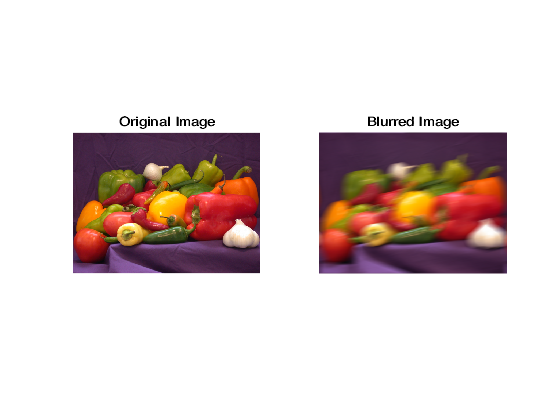

In [11]:
% First we read and visualize the image:
I = im2double(imread('peppers.png'));
figure(1)
subplot(1,2,1);
imshow(I);
title('Original Image');
% We create the operator H by using a PSF function
LEN = 31;
THETA = 11;
PSF = fspecial('motion',LEN,THETA);
Blurred = imfilter(I,PSF,'circular','conv');
figure(1);
subplot(1,2,2);
imshow(Blurred);
title('Blurred Image');

We need to discuss several aspects of these commands, first of all we need to
describe how we build the $H$ operator. This is done through the usage of a
**P**oint **S**pread **F**unction (PSF), this function describes the response
of the imaging system we are using when solicited by a point source. If we have
in mind the model of a camera, this essentially tells us how a single ray of
light (the point source) is distorted by the equipment we are using.

We produce a **synthetic response** by means of the `fspecial` function, its
`help` produce
```
fspecial Create predefined 2-D filters.
   H = fspecial(TYPE) creates a two-dimensional filter H of the
   specified type. Possible values for TYPE are:

     'average'   averaging filter
     'disk'      circular averaging filter
     'gaussian'  Gaussian lowpass filter
     'laplacian' filter approximating the 2-D Laplacian operator
     'log'       Laplacian of Gaussian filter
     'motion'    motion filter
     'prewitt'   Prewitt horizontal edge-emphasizing filter
     'sobel'     Sobel horizontal edge-emphasizing filter
```
that proposes several type of filters. We selected a `motion blur`, that
represents a linear motion of a camera by `LEN` pixels, with an angle of `THETA`
degrees in a counter-clockwise direction. Then, we build the operator $H$ by
using the `imfilter` function. This operation needs the image on which we want
to apply the the filtering, the PSF, the way in which we decide to model the
boundaries of the image:
```
B = imfilter(A,H,OPTION1,OPTION2,...) performs multidimensional
filtering according to the specified options.  Option arguments can
have the following values:

- Boundary options

    X            Input array values outside the bounds of the array
                 are implicitly assumed to have the value X.  When no
                 boundary option is specified, imfilter uses X = 0.

    'symmetric'  Input array values outside the bounds of the array
                 are computed by mirror-reflecting the array across
                 the array border.

    'replicate'  Input array values outside the bounds of the array
                 are assumed to equal the nearest array border
                 value.

    'circular'   Input array values outside the bounds of the array
                 are computed by implicitly assuming the input array
                 is periodic.
```
This is a **crucial** part, we need to guess how the image behaves out of the
picture frame. This value are needed to close the model equation. For this test
case we selected the `circular` option, that assumes that the values at the
boundary are periodic. The last option decides how the PSF is transformed into
the operator $H$
```
- Correlation and convolution

    'corr'       imfilter performs multidimensional filtering using
                 correlation, which is the same way that FILTER2
                 performs filtering.  When no correlation or
                 convolution option is specified, imfilter uses
                 correlation.

    'conv'       imfilter performs multidimensional filtering using
                 convolution.
```
Following the intuition behind the choice of the camera model, we decide for
a `conv` process. At the end of this whole procedure, the variable `Blurred`
contains the deteriorated image that we want to restore.

To **complete the problem** to a realistic solution, we need to also add some
noise to the image. We have seen this procedure already in the previous
section.

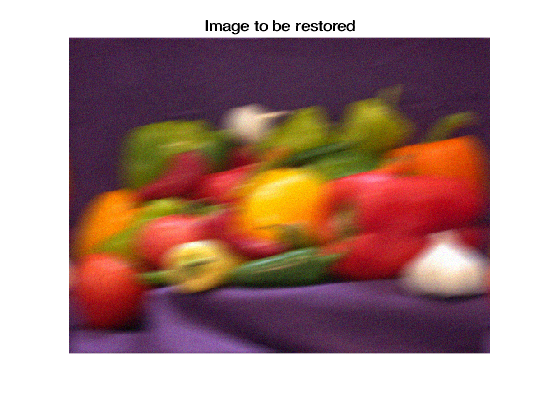

In [12]:
BlurredNoised = imnoise(Blurred,'gaussian',0,0.001);
figure(2)
imshow(BlurredNoised);
title('Image to be restored');

Now that we have the problem we want to solve, we can look at the routine
proposed by MATLAB to solve this problem.

We use the `deconvwnr` function, this function requires as inputs the PSF, and
the noise-to-signal-power ratio, let us start by looking at what happens if we miss the
level of noise. As an example, let us suppose that we underestimate it, and
decide that our image has no noise whatsoever:

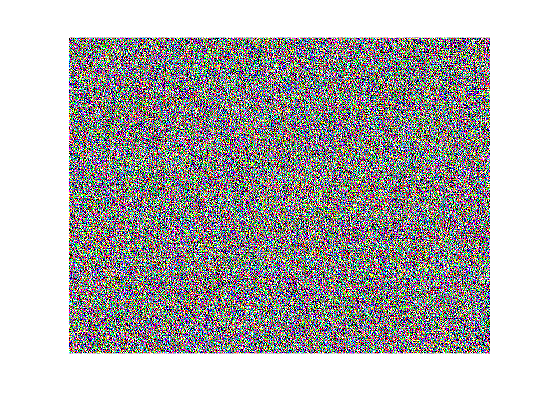

In [13]:
nsr = 0;
Restored = deconvwnr(BlurredNoised,PSF,nsr);
imshow(Restored);

With this poor choice the algorithm is incapable of finding anything useful. We
end up with a worse reconstruction than the image we had start with. In principle
the problem we are trying to solve is nothing more than a linear system, the
problem is that *we do not want to solve it completely*, if we do a complete
solution we end up recovering only noise! Thus, many of the algorithms for this
task require that the user provide an estimate of the noise. This is used to
halt the solution procedure at a point in which the obtained solution makes
sense. Thus, let us try with a better guess:

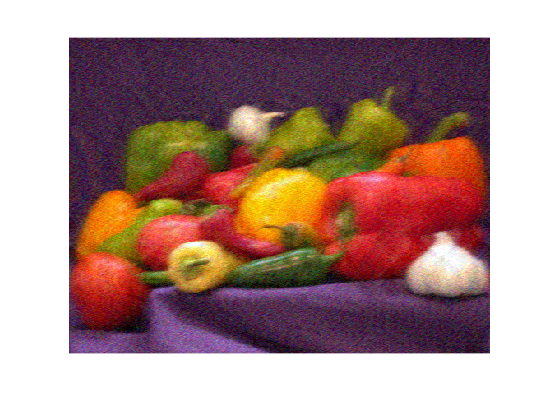

In [14]:
nsr = 0.001 / var(I(:));
Restored = deconvwnr(BlurredNoised,PSF,nsr);
figure(3)
imshow(Restored);

That is indeed a better result.